In [2]:
!pip install -q yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 14.2 MB/s eta 0:00:00


In [10]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import yfinance as yf

In [4]:
cotacoes=['ABEV3.SA','PETR4.SA','VALE3.SA','ITSA4.SA']

In [5]:
cotacoes_df=pd.DataFrame()

for cot in cotacoes:
  cotacoes_df[cot]=yf.download(cot, start='2010-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
cotacoes_df

,ABEV3.SA,PETR4.SA,VALE3.SA,ITSA4.SA
Date,,,,
2010-01-04,6.113138,37.320000,51.490002,5.897140
2010-01-05,6.149098,37.000000,51.970001,5.878071
2010-01-06,6.211828,37.500000,53.070000,5.806562
2010-01-07,6.240995,37.150002,53.290001,5.773191
2010-01-08,6.229008,36.950001,53.810001,5.730285
...,...,...,...,...
2023-02-09,13.020000,25.930000,88.389999,8.620000
2023-02-10,12.860000,26.719999,86.800003,8.530000
2023-02-13,13.130000,26.799999,86.709999,8.740000


Analise Grafica

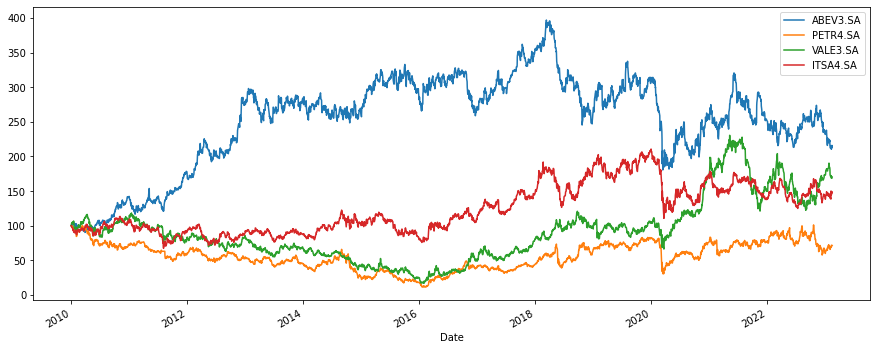

In [7]:
(cotacoes_df/cotacoes_df.iloc[0]*100).plot(figsize=(15,6))

In [8]:
#Calculo do retorno do portfolio de ações

retorno=(cotacoes_df/cotacoes_df.shift(1))-1

retorno.head()

,ABEV3.SA,PETR4.SA,VALE3.SA,ITSA4.SA
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.005882,-0.008574,0.009322,-0.003234
2010-01-06,0.010202,0.013514,0.021166,-0.012165
2010-01-07,0.004695,-0.009333,0.004145,-0.005747
2010-01-08,-0.001921,-0.005384,0.009758,-0.007432


In [11]:
# Pesos 

pesos=np.array([0.25,0.25,0.25,0.25])


In [13]:
#Retorno anualizado

retorno_anual=retorno.mean()*250

retorno_anual

ABEV3.SA    0.093864
PETR4.SA    0.082384
VALE3.SA    0.126596
ITSA4.SA    0.076473
dtype: float64

In [17]:
# Retorno portfolio balanceado 

round(np.dot(retorno_anual,pesos),4)*100

9.48

In [20]:
# Retorno portfólio desbalanceado

pesos2=np.array([0.45,0.15,0.35,0.05])

In [22]:
round(np.dot(retorno_anual,pesos2),4)*100

10.27